**Blending Images is done through the addWeighted function that uses both images and combines them.**

**To blend images we use a simple formula :**
new pixel = (ALPHA)x pixel_1 + (BETA)x pixel_2 + (GAMMA)

In [6]:
import cv2

img1 = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

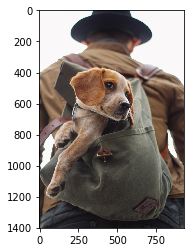

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img1)

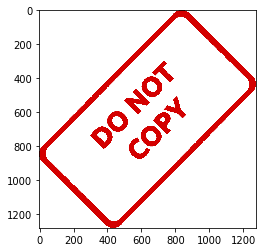

In [8]:
plt.imshow(img2)

In [9]:
img1.shape

(1401, 934, 3)

In [10]:
img2.shape

(1280, 1277, 3)

In [11]:
##Blending images of the same size

In [13]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

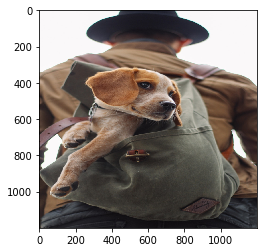

In [14]:
plt.imshow(img1)

In [15]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

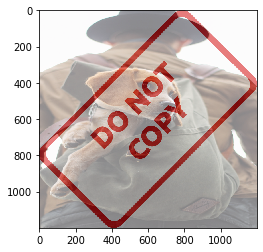

In [16]:
plt.imshow(blended)

In [43]:
blended = cv2.addWeighted(src1=img1, alpha=0.7, src2=img2, beta=0.1, gamma=20)

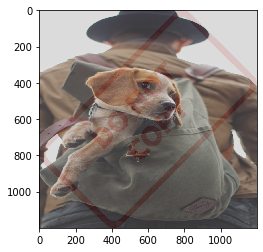

In [44]:
plt.imshow(blended)

**Gamma increases image intensity**

In [47]:
## OVERLAY SMALL IMAGE ON TOP OF A LARGE IMAGE (NO BLENDING)
##Numpy reassignment

In [49]:
img1 = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

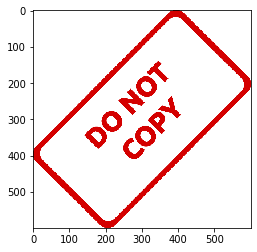

In [50]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

In [51]:
large_img = img1
small_img = img2

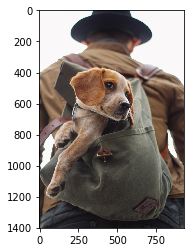

In [52]:
plt.imshow(img1)

In [54]:
x_start = 0
y_start = 0

In [55]:
x_end = x_start + img2.shape[1]
y_end = y_start + img2.shape[0]

In [56]:
large_img[y_start:y_end, x_start:x_end] = small_img

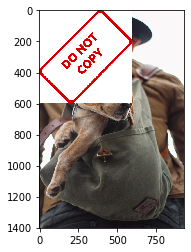

In [57]:
plt.imshow(large_img)

**There is a difference in how Numpy sees the image v/s how OpenCV sees it. The vertical cols. (in the order of top to bottom) is the x_axis of the image while numpy sees them as y-axis. Same goes with the horizontal cols.**

In [48]:
## BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [58]:
img1 = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('C:/Users/dell/Documents/Udemy OpenCV course/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

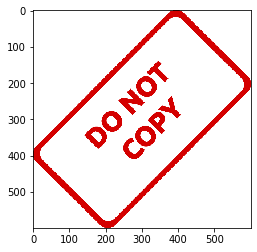

In [62]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

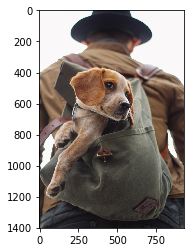

In [63]:
plt.imshow(img1)

In [64]:
img1.shape

(1401, 934, 3)

In [65]:
x_start = 934-600
y_start = 1401-600

In [68]:
roi = img1[y_start:1401, x_start:934]

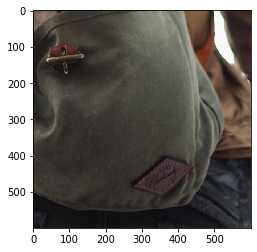

In [69]:
plt.imshow(roi)

In [71]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

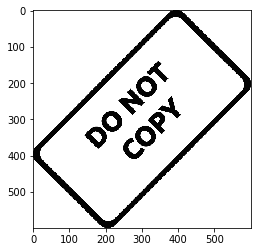

In [73]:
plt.imshow(img2gray, cmap='gray')

In [74]:
mask_inv = cv2.bitwise_not(img2gray)

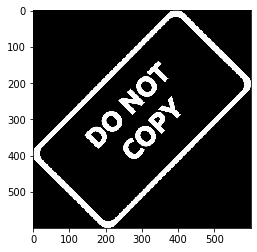

In [76]:
plt.imshow(mask_inv, cmap='gray')

In [77]:
mask_inv.shape

(600, 600)

**It no longer contains the color channels. And what we need to do is add-in the color channels so that the two images are compatible with each other**

In [78]:
import numpy as np

In [79]:
white_bg = np.full(img2.shape,255)

In [80]:
## white background

In [88]:
bk = cv2.bitwise_or(white_bg, white_bg, mask=mask_inv)

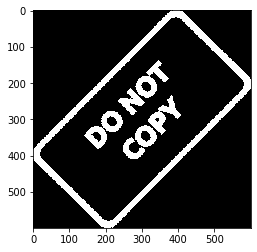

In [89]:
plt.imshow(bk)

In [90]:
bk.shape

(600, 600, 3)

In [93]:
fg = cv2.bitwise_or(img2,img2, mask=mask_inv)

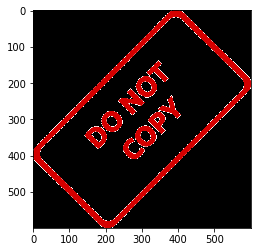

In [94]:
plt.imshow(fg)

In [100]:
final_roi = cv2.bitwise_or(roi,fg)

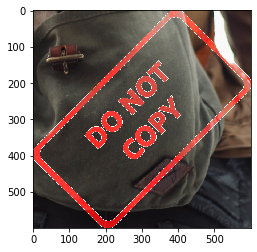

In [101]:
plt.imshow(final_roi)

In [103]:
large_img = img1
small_img = final_roi

In [104]:
large_img[y_start:y_start+final_roi.shape[1], x_start:x_start+final_roi.shape[0]] = small_img

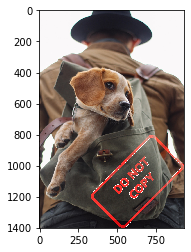

In [105]:
plt.imshow(large_img)

Check out these documentation examples and links for more help for these kinds of tasks (which can be really tricky!)

1.https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075

2.https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv

3.https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html